# Import Packages

In [21]:
# pip install pingouin

In [22]:
import pandas as pd
import numpy as np
import pingouin as pg
from scipy import stats

import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns

In [23]:
pd.option_context('mode.use_inf_as_na', True)

plt.rcParams['font.family']=['Arial','serif', 'Times New Roman']
plt.style.use('default')
mpl.rcParams["axes.unicode_minus"] = False
%config InlineBackend.figure_format = 'svg'


# Load Data

In [24]:
path = "../data/BehaviorData/Subject_"

data = { 'type':[], 'answer':[], 'time':[], 'subject':[] }

reject_num = { 'longer_than_3_sec':np.zeros((27)), 'longer_than_3_std':np.zeros((27)) }

symbol_type = ['', 'P','I','T']

for subject in range(1, 28):
    file_path = path + str(subject) + '.csv'
    tmp = pd.read_csv(file_path)
    
    marker1 = tmp['marker1'].to_list()
    marker2 = tmp['marker2'].to_list()
    answer = tmp['user_answer.corr'].to_list()
    time = tmp['user_answer.rt'].to_list()
    
    for index, t in enumerate(time):

        if t <= 3.0:
            data['type'].append( symbol_type[int(str(marker1[index])[1])] + '-' + symbol_type[int(str(marker2[index])[1])] )
            data['answer'].append( answer[index] )
            data['time'].append( t )
            data['subject'].append( subject )
        else:
            reject_num['longer_than_3_sec'][subject-1] += 1
            
data = pd.DataFrame(data)
print(data.head())
print(data.tail(), '\n')

all_trial_number = len(data)+ np.sum(reject_num['longer_than_3_sec'])
print( all_trial_number, '-', np.sum(reject_num['longer_than_3_sec']), '=',  len(data), '\n' )
print( np.sum(reject_num['longer_than_3_sec']) / all_trial_number )

  type  answer      time  subject
0  P-I       1  0.408432        1
1  T-I       1  0.397418        1
2  T-P       1  0.498131        1
3  P-I       1  0.413264        1
4  P-I       1  0.482632        1
      type  answer      time  subject
11394  P-P       1  0.432998       27
11395  T-T       1  0.513399       27
11396  P-T       1  0.393375       27
11397  P-P       1  1.304987       27
11398  T-I       1  0.410515       27 

12150.0 - 751.0 = 11399 

0.06181069958847737


# Data Cleaning

In [25]:
subject_rt_mean = []
subject_rt_std = []

subject_rt_thresh_min = [0]
subject_rt_thresh_max = [0]

for subject in range(1, 28):
    mean = np.mean(data[data['subject'] == subject]['time'])
    std = np.std(data[data['subject'] == subject]['time'])

    subject_rt_thresh_min.append(mean - 3*std)
    subject_rt_thresh_max.append(mean + 3*std)


In [26]:

clean_data = { 'type':[], 'subject':[], 'time':[] }

for index, d in data.iterrows():

    if (d['time'] > subject_rt_thresh_max[d['subject']]) or (d['time'] < subject_rt_thresh_min[d['subject']]) :
        reject_num['longer_than_3_std'][d['subject']-1] += 1
        continue
    
    clean_data['type'].append(d['type'])
    clean_data['subject'].append(d['subject'])
    clean_data['time'].append(d['time'])

clean_data = pd.DataFrame(clean_data)

print( np.sum(reject_num['longer_than_3_std']), '\n' )
print( np.sum(reject_num['longer_than_3_std']) / all_trial_number , '\n')

exclude_trial_number = all_trial_number-len(clean_data)
print( all_trial_number, '-', len(clean_data), '=', exclude_trial_number )
print( exclude_trial_number / all_trial_number )
print( len(clean_data) / all_trial_number )


221.0 

0.018189300411522634 

12150.0 - 11178 = 972.0
0.08
0.92


In [27]:
print(np.sum(reject_num['longer_than_3_sec'] + reject_num['longer_than_3_std']))
print(np.mean(reject_num['longer_than_3_sec'] + reject_num['longer_than_3_std']))
print(np.std(reject_num['longer_than_3_sec'] + reject_num['longer_than_3_std']))

972.0
36.0
22.96051360891531


In [7]:
# Average reaction time

subject_avg_rt = { 'type':[], 'subject':[], 'time':[] }

for subject in range(1,28):
    for symbol_type in [ 'P-P', 'I-I', 'T-T', 'P-I', 'I-P', 'P-T', 'T-P', 'I-T', 'T-I' ]:
        mean_time = np.mean(clean_data[(clean_data['subject'] == subject) & (clean_data['type'] == symbol_type)]['time'])
        
        subject_avg_rt['type'].append(symbol_type)
        subject_avg_rt['subject'].append(subject)
        subject_avg_rt['time'].append(mean_time)
        
subject_avg_rt = pd.DataFrame(subject_avg_rt)


# Plot Data

In [8]:
font = {'family' : ['Arial', 'Times new roman', 'Microsoft YaHei'],
        'color'  : 'k',
        'weight' : 'normal',
        'size'   : 9,
        } 
font_s = {'family': ['Arial', 'Times new roman', 'Microsoft YaHei'],
        'color'  : 'k',
        'weight' : 'normal',
        'size'   : 8,
        } 

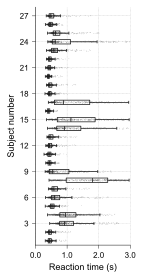

In [9]:

fig,ax = plt.subplots(figsize=(1.7, 4.3),facecolor="w") 

ax = sns.stripplot(data=clean_data, x='time', y='subject', size=0.5,  color=(0.2,0.2,0.2,0.6), ax=ax, orient='h', zorder=0)

ax = sns.boxplot(data=clean_data, x='time', y='subject', ax=ax, color=(0.1,0.1,0.1,1.0), fill=False, 
                 linewidth=0.75, orient="h", #linecolor=(0.2,0.2,0.2,1.0),
                 width=0.5, fliersize=0.0, saturation=0.8, 
                 )

plt.grid(axis='both',ls=':',c='gray', linewidth=0.3, zorder=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(which='both', bottom=True, top=False, left=True, right=False,
               labelbottom=True, labelleft=True, direction='out',width=0.4)

plt.xlabel("Reaction time (s)", fontdict=font)
plt.ylabel("Subject number", fontdict=font)

plt.xlim(0.0, 3.0)
plt.ylim(-0.5, 27)

plt.xticks([0.0,1.0,2.0,3.0], [0.0,1.0,2.0,3.0], fontdict=font_s);
plt.yticks([2,5,8,11,14,17,20,23,26],[3,6,9,12,15,18,21,24,27], fontdict=font_s); #0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6


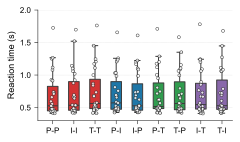

In [10]:
alpha = 1.0
barplot_color = [[210/255, 52/255, 52/255, alpha], [210/255, 52/255, 52/255, alpha], [210/255, 52/255, 52/255, alpha],
                 [30/255, 119/255, 168/255, alpha],[30/255, 119/255, 168/255, alpha],
                 [49/255, 156/255, 79/255, alpha],[49/255, 156/255, 79/255, alpha],
                 [137/255, 104/255, 171/255, alpha],[137/255, 104/255, 171/255, alpha]]  #252/255, 93/255, 36/255
# barplot_color = [ "#E64B35", "#4DBBD5", "#00A087", "#3C5488", "#F39B7F", "#8491B4", "#91D1C2", "#7E6148" ]

labels = [ 'P-P', 'I-I', 'T-T', 'P-I', 'I-P', 'P-T', 'T-P', 'I-T', 'T-I' ]

fig,ax = plt.subplots(figsize=(3.5, 2.0),facecolor="w") #dpi=100

ax = sns.boxplot(data=subject_avg_rt, x='type', y='time', order=labels, ax=ax,
                 fill=True, linewidth=1.0, hue='type', palette=barplot_color, 
                 width=0.5, fliersize=0.0, saturation=1.0, color='k',
                 )

sns.stripplot(data=subject_avg_rt, x='type', y='time', size=3,  alpha=0.8, #hue='type'
              color=[1.0,1.0,1.0,1.0], edgecolor='k', linewidth=0.5 ) #palette=barplot_color,

ax.grid(axis='y',ls=':',c='gray', linewidth=0.2, zorder=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(which='both', bottom=True, top=False, left=True, right=False,
               labelbottom=True, labelleft=True, direction='out',width=0.5)

plt.ylabel("Reaction time (s)", fontdict=font)
plt.xlabel("")

plt.xlim(-0.7, 8.5)
plt.ylim(0.3, 2.0)
plt.xticks([0,1,2,3,4,5,6,7,8], labels, fontdict=font_s);
plt.yticks([0.5,1.0,1.5,2.0], [0.5,1.0,1.5,2.0], fontdict=font_s); 


# Normality Test

In [11]:
pg.normality(data=subject_avg_rt, dv='time', group='type', method='shapiro')

,W,pval,normal
type,,,
P-P,0.790011,0.000092,False
I-I,0.783614,0.000072,False
T-T,0.818252,0.000288,False
P-I,0.805415,0.000170,False
I-P,0.791337,0.000097,False
P-T,0.798236,0.000128,False
T-P,0.804616,0.000165,False
I-T,0.807024,0.000182,False
T-I,0.790021,0.000092,False


In [12]:
data_levene = []

for tp in [ 'P-P', 'I-I', 'T-T', 'P-I', 'I-P', 'P-T', 'T-P', 'I-T', 'T-I' ]:
    tmp = subject_avg_rt[subject_avg_rt['type']==tp]['time']
    data_levene.append(tmp)

    # normality test
    print(stats.shapiro(tmp))

# Levene's Test for Equality of Variances
print('\n')
print(stats.levene(*data_levene))

ShapiroResult(statistic=0.790011465549469, pvalue=9.234932804247364e-05)
ShapiroResult(statistic=0.783613920211792, pvalue=7.21372343832627e-05)
ShapiroResult(statistic=0.818252444267273, pvalue=0.0002883070847019553)
ShapiroResult(statistic=0.8054147362709045, pvalue=0.0001701067667454481)
ShapiroResult(statistic=0.7913367748260498, pvalue=9.72445122897625e-05)
ShapiroResult(statistic=0.7982357144355774, pvalue=0.00012758966477122158)
ShapiroResult(statistic=0.8046161532402039, pvalue=0.00016470818081870675)
ShapiroResult(statistic=0.807024359703064, pvalue=0.00018156769510824233)
ShapiroResult(statistic=0.7900211811065674, pvalue=9.238428174285218e-05)


LeveneResult(statistic=0.024546852838831824, pvalue=0.9999962428644964)


# Repeated measures ANOVA

In [13]:
# pg.rm_anova(data=subject_avg_rt, dv='time', within='type', subject='subject', detailed=True, correction=True, effsize='np2')

print(len(subject_avg_rt))

# Non parametric test
pg.friedman(data=subject_avg_rt, dv='time', within='type', subject='subject', method='chisq')

243


,Source,W,ddof1,Q,p-unc
Friedman,type,0.117558,8,25.392593,0.001333


# Pairwise multiple comparison

In [14]:
# Wilcoxon signed-rank test and Benjamini/Hochberg FDR correction

res = pg.pairwise_tests(data=subject_avg_rt, dv='time', within='type', subject='subject', parametric=False, padjust='fdr_bh', 
                        effsize='cohen').round(3)

for index, r in res.iterrows():
    if r['p-corr'] < 0.05:
        print(r['A'], r['B'], r['p-corr'])

pg.pairwise_tests(data=subject_avg_rt, dv='time', within='type', subject='subject', parametric=False, padjust='fdr_bh', 
                        effsize='cohen').round(3)

I-I T-T 0.02
I-P P-I 0.049
I-P T-T 0.008
P-P T-T 0.008
T-I T-T 0.049
T-P T-T 0.008


,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,p-corr,p-adjust,cohen
0,type,I-I,I-P,True,False,183.0,two-sided,0.897,0.934,fdr_bh,0.027
1,type,I-I,I-T,True,False,121.0,two-sided,0.106,0.293,fdr_bh,-0.030
2,type,I-I,P-I,True,False,125.0,two-sided,0.129,0.299,fdr_bh,-0.027
3,type,I-I,P-P,True,False,160.0,two-sided,0.500,0.686,fdr_bh,0.039
4,type,I-I,P-T,True,False,158.0,two-sided,0.470,0.686,fdr_bh,-0.008
5,type,I-I,T-I,True,False,184.0,two-sided,0.915,0.934,fdr_bh,-0.027
6,type,I-I,T-P,True,False,181.0,two-sided,0.859,0.934,fdr_bh,0.007
7,type,I-I,T-T,True,False,66.0,two-sided,0.002,0.020,fdr_bh,-0.114
8,type,I-P,I-T,True,False,118.0,two-sided,0.091,0.293,fdr_bh,-0.058
9,type,I-P,P-I,True,False,79.0,two-sided,0.007,0.049,fdr_bh,-0.056
